**Caltrans PRD Excel Extract**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

In [48]:
CA_PRD = pd.DataFrame()

for year in range(2001, 2023):
    tab = 'Table 1' if year >= 2017 else f'{year} PRD_Table 1'
    temp = pd.read_excel(pd.ExcelFile(f'HPMS2001_2022_PRD/{year}_PRD.xlsx'), tab)
    
    # temp = temp[temp.iloc[:, 0]=='TOTAL']
    temp = temp[temp.iloc[:, 0].isin(['TOTAL', 'STATEWIDE TOTAL'])]

    temp = temp.dropna(axis=1, how='all')
    temp.columns = ['Jurisdiction', 'Total Maintained Miles', 'Lane Miles', 'Annual VMT (Millions)']
    
    CA_PRD = pd.concat([CA_PRD, temp])
    print(f'{year} successful')

# Reset the index of the final DataFrame
CA_PRD.reset_index(drop=True, inplace=True)
CA_PRD


2001 successful
2002 successful
2003 successful
2004 successful
2005 successful
2006 successful
2007 successful
2008 successful
2009 successful
2010 successful
2011 successful
2012 successful
2013 successful
2014 successful
2015 successful
2016 successful
2017 successful
2018 successful
2019 successful
2020 successful
2021 successful
2022 successful


,Jurisdiction,Total Maintained Miles,Lane Miles,Annual VMT (Millions)
0,TOTAL,166849.748056,370438.409086,304478.320345
1,TOTAL,167879.885609,373852.304994,321606.737266
2,TOTAL,169579.885459,377462.495694,323655.774153
3,TOTAL,169950.254325,378826.568422,328419.776293
4,TOTAL,169905.722686,379412.509944,327445.676035
5,TOTAL,170296.670693,380375.650957,329775.058434
6,TOTAL,171154.133166,382953.90211,330414.813487
7,TOTAL,172511.33,386791.48,325754.69
8,TOTAL,171873.92,386021.41,324275.08
9,TOTAL,172138.659,387041.42,326290.007009


In [49]:
pd.read_excel(pd.ExcelFile(f'HPMS2001_2022_PRD/2012_PRD.xlsx'), '2012 PRD_Table 1')[
    pd.read_excel(pd.ExcelFile(f'HPMS2001_2022_PRD/2012_PRD.xlsx'), '2012 PRD_Table 1').iloc[:, 0] == 'STATEWIDE TOTAL'].dropna(axis=1, how='all')

,Unnamed: 0,TABLE 1,Unnamed: 6,Unnamed: 8
44,STATEWIDE TOTAL,175543.793,394593.889,326547.202769


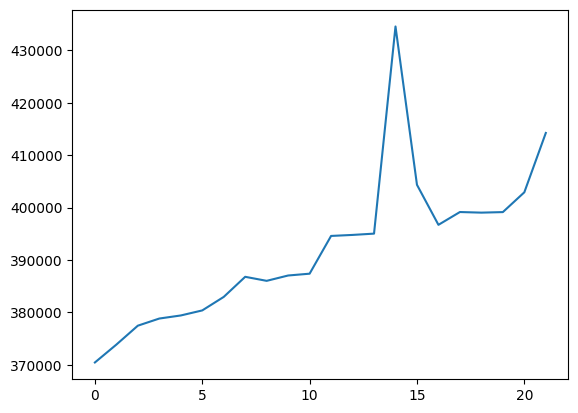

In [50]:
plt.plot(CA_PRD['Lane Miles'])

In [47]:
def hwymiles(county):
    TAB5_PRD = pd.DataFrame()
    for year in range(2001, 2023):
        tab = 'Table 5' if year >= 2017 else f'{year} PRD_Table 5'
        temp = pd.read_excel(pd.ExcelFile(f'HPMS2001_2022_PRD/{year}_PRD.xlsx'), tab)
        
        temp = temp.dropna(axis=1, how='all')
        temp = temp[temp.iloc[:, 0]==f'{county}']
        
        temp.columns = ['County', 'City Road', 'County Roads', 'State Highway', 'NA1', 'NA2', 'NA3', 'NA4', 'Total']
        
        TAB5_PRD = pd.concat([TAB5_PRD, temp])

    # Reset the index of the final DataFrame
    TAB5_PRD.reset_index(drop=True, inplace=True)
    TAB5_PRD['Year'] = np.arange(2001, 2023)
    
    plt.plot(TAB5_PRD['Year'], TAB5_PRD['State Highway'])
    plt.title(f'{county} County State-Highway Miles')
    plt.grid()


Worksheet named '2008 PRD_Table 6' not found for the year 2008.
Worksheet named '2009 PRD_Table 6' not found for the year 2009.


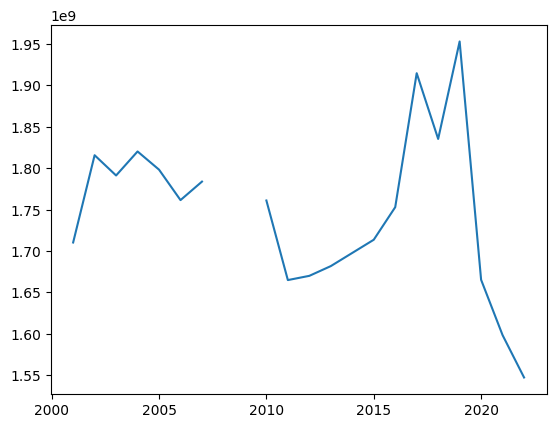

In [46]:
def VMT(county, value_2008, value_2009):
    TAB6_PRD = pd.DataFrame()

    # Iterate over the years
    for year in range(2001, 2023):
        try:
            # Load the data
            tab = 'Table 6' if year >= 2017 else f'{year} PRD_Table 6'
            
            try:
                temp = pd.read_excel(pd.ExcelFile(f'HPMS2001_2022_PRD/{year}_PRD.xlsx'), tab)
            except ValueError:
                print(f"Worksheet named '{tab}' not found for the year {year}.")
                temp = pd.DataFrame([[np.nan]*8], columns=['County', 'NA', 'Rural Miles', 'Urban Miles', 'Total Miles', 'Rural DVMT', 'Urban DVMT', 'Total DVMT'])
                temp['Year'] = year
                TAB6_PRD = pd.concat([TAB6_PRD, temp])
                continue
            
            temp = temp.dropna(axis=1, how='all')
            temp = temp[temp.iloc[:, 0].str.contains(f'^{re.escape(county)}\s+TOTAL$', case=False, na=False)]
            
            temp.columns = ['County', 'NA', 'Rural Miles', 'Urban Miles', 'Total Miles', 'Rural DVMT', 'Urban DVMT', 'Total DVMT']
            
            # Add a column for the year
            temp['Year'] = year
            
        except FileNotFoundError:
            print(f"Data file for the year {year} is missing.")
            # Create a row of NaNs for the missing year
            temp = pd.DataFrame([[np.nan]*8], columns=['County', 'NA', 'Rural Miles', 'Urban Miles', 'Total Miles', 'Rural DVMT', 'Urban DVMT', 'Total DVMT'])
            temp['Year'] = year
            TAB6_PRD = pd.concat([TAB6_PRD, temp])
            continue
        except Exception as e:
            # print(f"An error occurred for the year {year}: {e}")
            continue

        TAB6_PRD = pd.concat([TAB6_PRD, temp])
        # print(f'{year} processed')

    # Reset the index of the final DataFrame
    TAB6_PRD.reset_index(drop=True, inplace=True)

    TAB6_PRD.loc[(TAB6_PRD['Year'] == 2008), 'Total DVMT'] = value_2008
    TAB6_PRD.loc[(TAB6_PRD['Year'] == 2009), 'Total DVMT'] = value_2009

    return TAB6_PRD

# Call the function
TAB6_PRD = VMT('BUTTE', np.nan, np.nan)
plt.plot(TAB6_PRD['Year'], TAB6_PRD['Total DVMT']*1000*365)
